# Notebook Imports

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import cm

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import pandas as pd
%matplotlib inline

# Gather Data

[Source: Original research paper](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1)

In [2]:
boston_dataset = load_boston()

In [3]:
type(boston_dataset)

sklearn.utils.Bunch

In [4]:
boston_dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
dir(boston_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [6]:
print(boston_dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
type(boston_dataset.data)

numpy.ndarray

In [8]:
boston_dataset.data.shape

(506, 13)

In [9]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [10]:
# House prices in thousands(000s)

boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [11]:
# Creating pandas dataframe for the data
data = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)

# Adding column to the dataframe
data['PRICE'] = boston_dataset.target
data

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.14   21.6  
2       17.8  392.83   4.03   34.7  
3       18.7  394.63   2.94   33.4  
4       18.7  396.90   5.33   36.2  
..       ...     ...    ...    ...  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9  

[506 rows x 14 columns]

In [12]:
# Shows top rows in the dataset
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [13]:
# Shows the bottom rows in the dataset
data.tail()

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9

In [14]:
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

# Cleaning Data - check for the missing values

In [15]:
pd.isnull(data)

CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False  False  False  False  False  False  False  False  False   
502  False  False  False  False  False  False  False  False  False  False   
503  False  False  False  False  False  False  False  False  False  False   
504  False  False  False  False  False  False  False  False  False  False   
505  False  False  False  False  False  False  False  False  False  False   

     PTRATIO      B  LSTAT  PRICE  
0      False  False  False  False  
1      False  False  False  False  
2      False  False  False  False  
3      False  False  False  False  
4      False  False  False  False  
..       ...    ...    ...    ...  
501    False  False  False  False  
502    False  False  False  False  
503    False  False  False  False  
504    False  False  False  False  
505    False  False  False  False  

[506 rows x 14 columns]

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


# Visualising Data - Histograms, Distributions and Bar charts

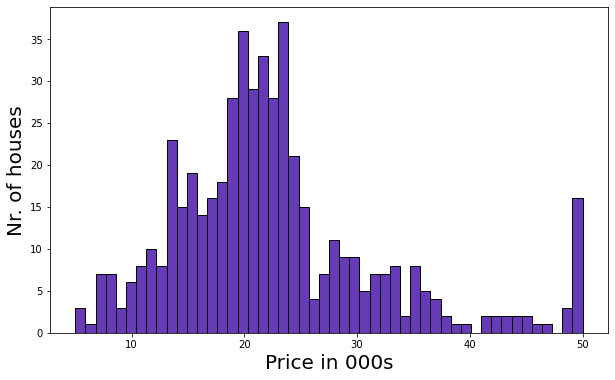

In [17]:
plt.figure(figsize=(10, 6))
plt.xlabel('Price in 000s', fontsize=20)
plt.ylabel('Nr. of houses', fontsize=20)
plt.hist(data['PRICE'], bins=50, ec='black', color="#673AB7")
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


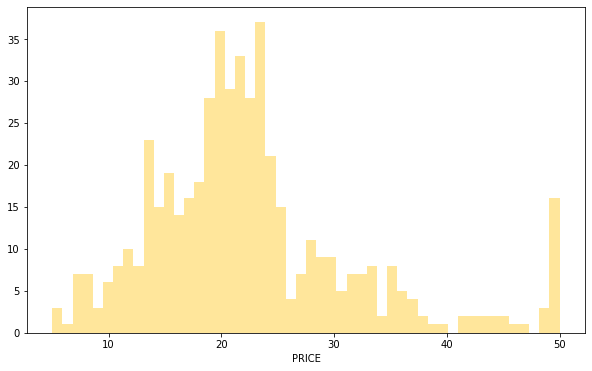

In [18]:
plt.figure(figsize=(10, 6))
sns.distplot(data['PRICE'], bins=50, hist=True, kde=False, color="#FFC107")
plt.show()

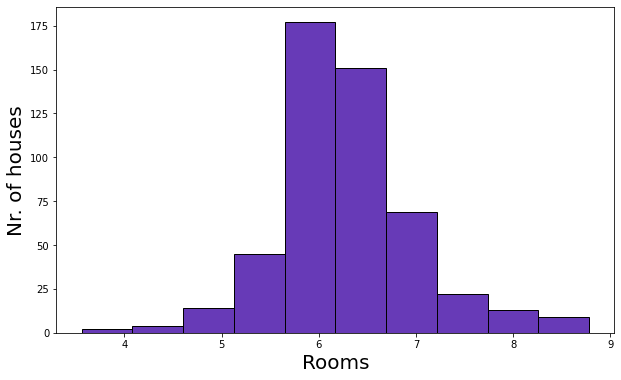

In [19]:
plt.figure(figsize=(10, 6))
plt.xlabel('Rooms', fontsize=20)
plt.ylabel('Nr. of houses', fontsize=20)
plt.hist(data['RM'], ec='black', color="#673AB7")
plt.show()

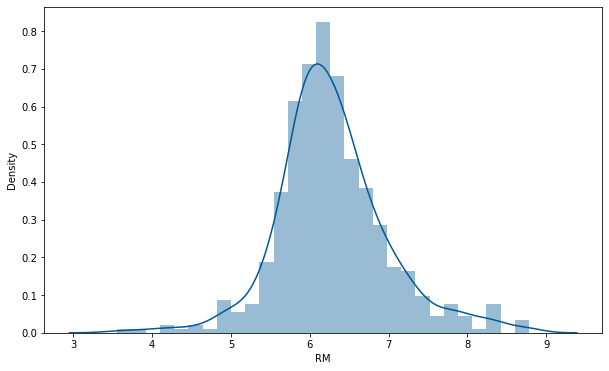

In [20]:
plt.figure(figsize=(10, 6))
sns.distplot(data['RM'], hist=True, kde=True, color="#005792")
plt.show()

In [21]:
data['RM'].mean()

6.284634387351787

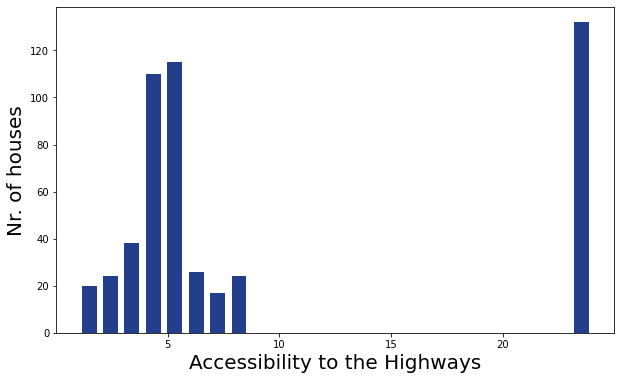

In [22]:
plt.figure(figsize=(10, 6))
plt.xlabel('Accessibility to the Highways', fontsize=20)
plt.ylabel('Nr. of houses', fontsize=20)
plt.hist(data['RAD'], bins =24, rwidth=0.7 , color="#233e8b")
plt.show()

In [23]:
frequency = data['RAD'].value_counts()

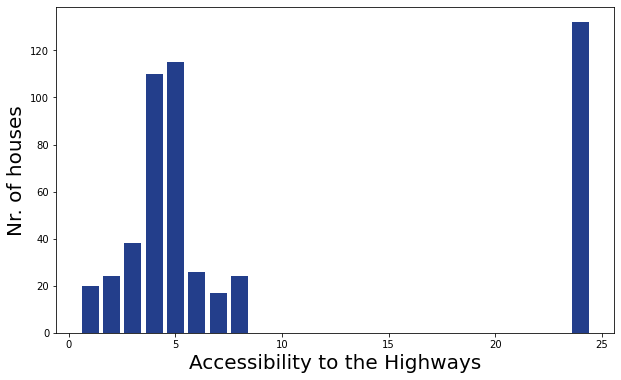

In [24]:
plt.figure(figsize=(10, 6))
plt.xlabel('Accessibility to the Highways', fontsize=20)
plt.ylabel('Nr. of houses', fontsize=20)
plt.bar(frequency.index, height=frequency, color="#233e8b")
plt.show()

In [25]:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

# Descriptive statistics

In [26]:
print(data.min())

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
PRICE        5.00000
dtype: float64


In [27]:
data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

# Correlation

## $$\rho_{(XY)} = corr(X, Y)$$
## $$-1.0 \leq \rho_{(XY)} \leq +1.0$$

In [28]:
data['PRICE'].corr(data['RM'])

0.695359947071539

In [29]:
data['PRICE'].corr(data['PTRATIO'])

-0.5077866855375615

In [30]:
data.corr() # Pearson correlation coefficients

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
PRICE   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     PRICE  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
PRICE    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

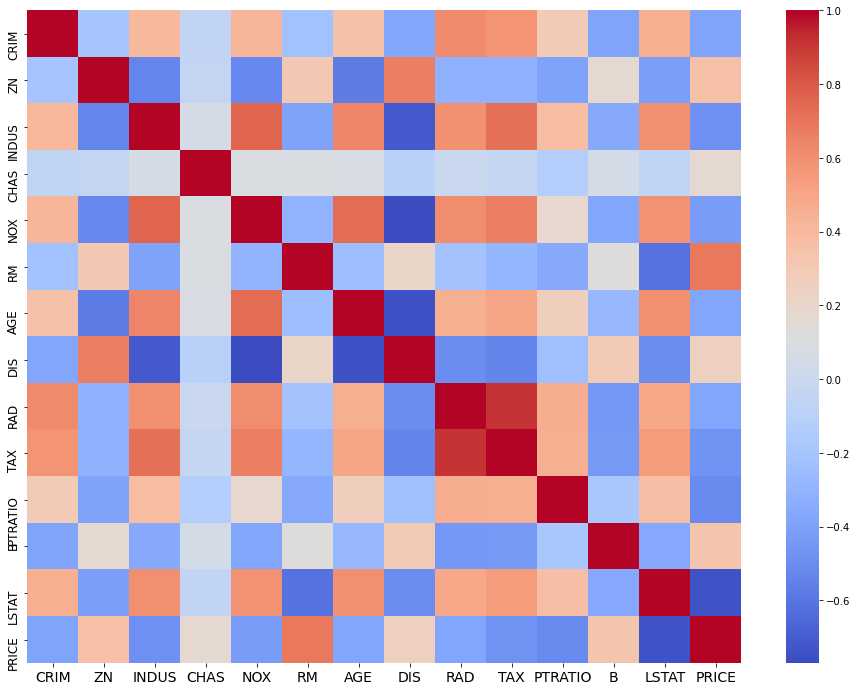

In [31]:
plt.figure(figsize=(16, 12))
sns.heatmap(data.corr(), cmap=cm.coolwarm)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.show()

In [32]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

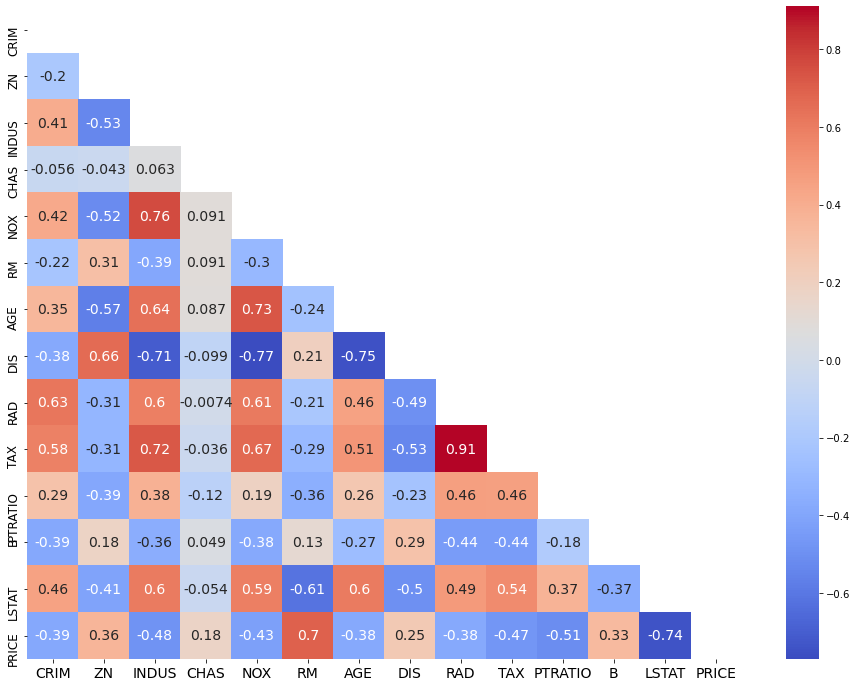

In [33]:
plt.figure(figsize=(16, 12))
sns.heatmap(data.corr(), mask=mask, cmap=cm.coolwarm, annot= True, annot_kws={'size':14})
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.show()

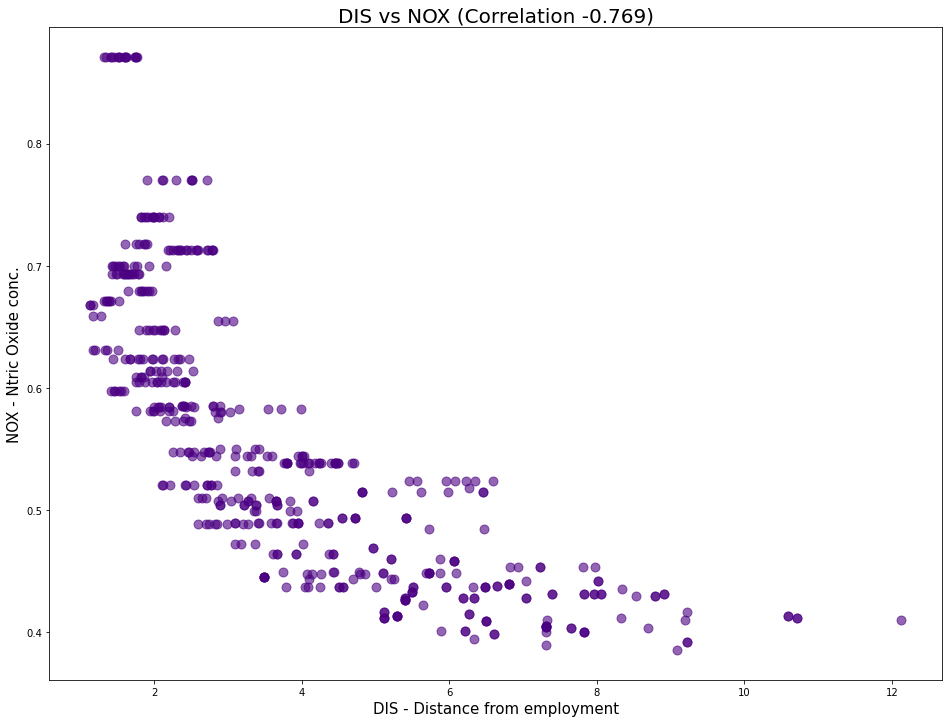

In [34]:
plt.figure(figsize=(16, 12))
nox_dis_corr = round(data['NOX'].corr(data['DIS']),3)
plt.title(f'DIS vs NOX (Correlation {nox_dis_corr})', fontsize=20)
plt.xlabel('DIS - Distance from employment', fontsize=15)
plt.ylabel('NOX - Ntric Oxide conc.', fontsize=15)
plt.scatter(data['DIS'],data['NOX'], alpha=0.6, s=80, c='indigo')
plt.show()

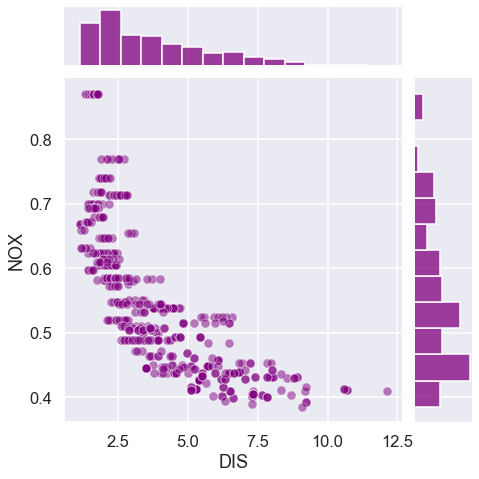

In [35]:
sns.set()
sns.set_context('talk')
sns.jointplot(x=data['DIS'], y=data['NOX'], height=7, joint_kws={'alpha':0.5}, color='purple')
plt.show()

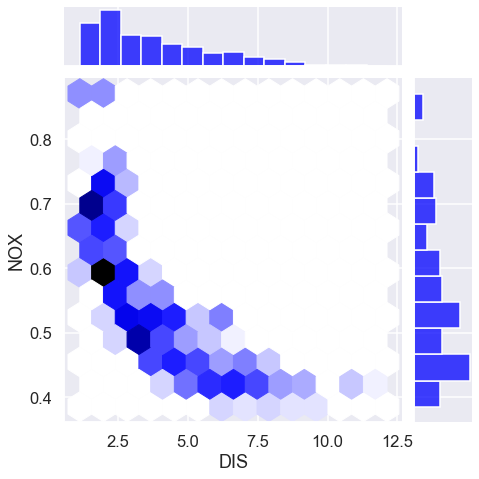

In [36]:
sns.set()
sns.set_context('talk')
sns.jointplot(x=data['DIS'], y=data['NOX'], height=7, kind='hex', color='blue')
plt.show()

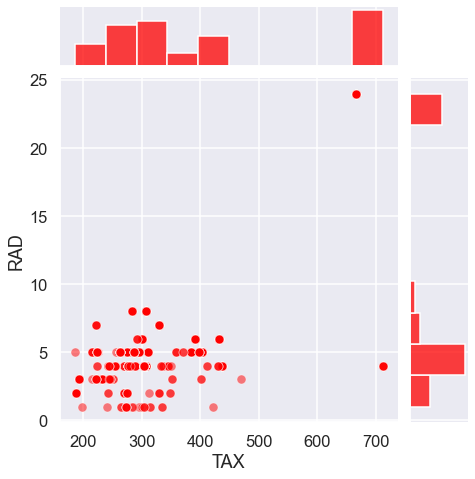

In [37]:
sns.set()
sns.set_context('talk')
sns.jointplot(x=data['TAX'], y=data['RAD'], height=7, joint_kws={'alpha':0.5}, color='red')
plt.plot()
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


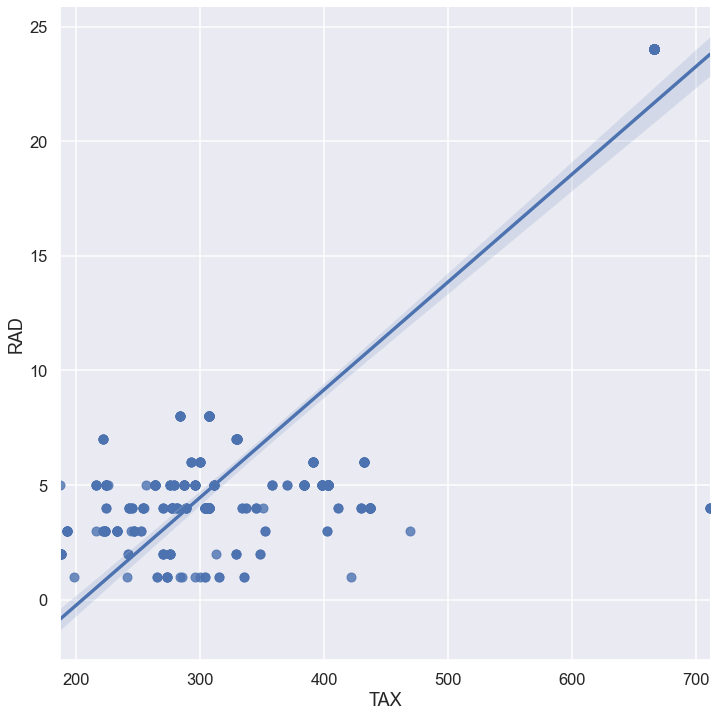

In [38]:
sns.lmplot(x='TAX', y='RAD', data=data, size=10)
plt.show()

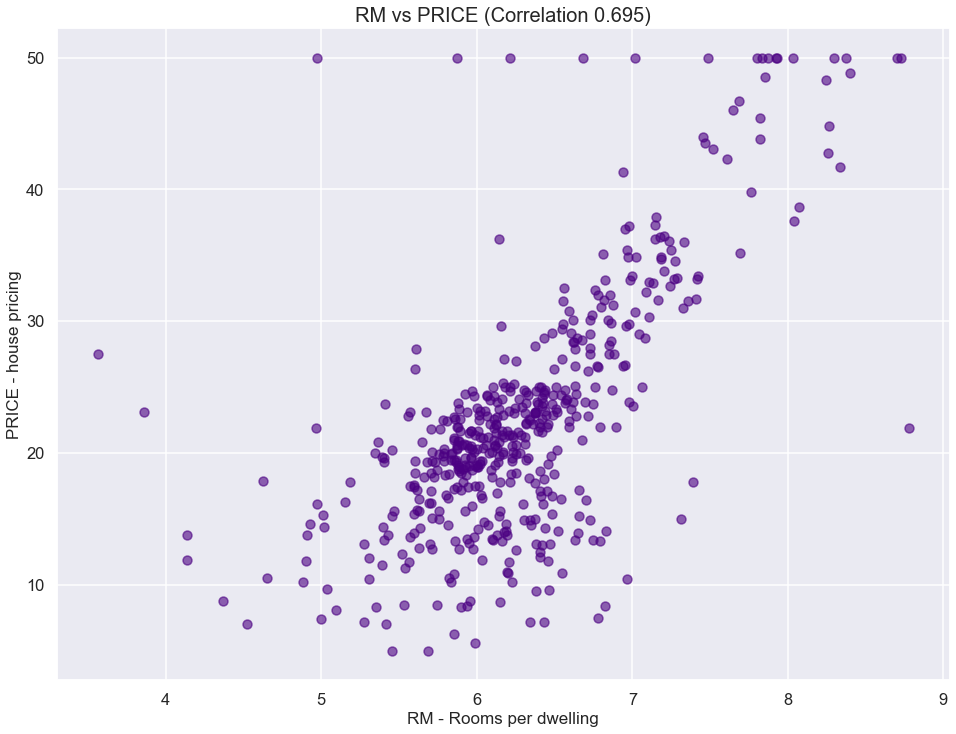

In [39]:
plt.figure(figsize=(16, 12))
rm_price_corr = round(data['RM'].corr(data['PRICE']),3)
plt.title(f'RM vs PRICE (Correlation {rm_price_corr})', fontsize=20)
plt.xlabel('RM - Rooms per dwelling', fontsize=17)
plt.ylabel('PRICE - house pricing', fontsize=17)
plt.scatter(data['RM'],data['PRICE'], alpha=0.6, s=80, c='indigo')
plt.show()

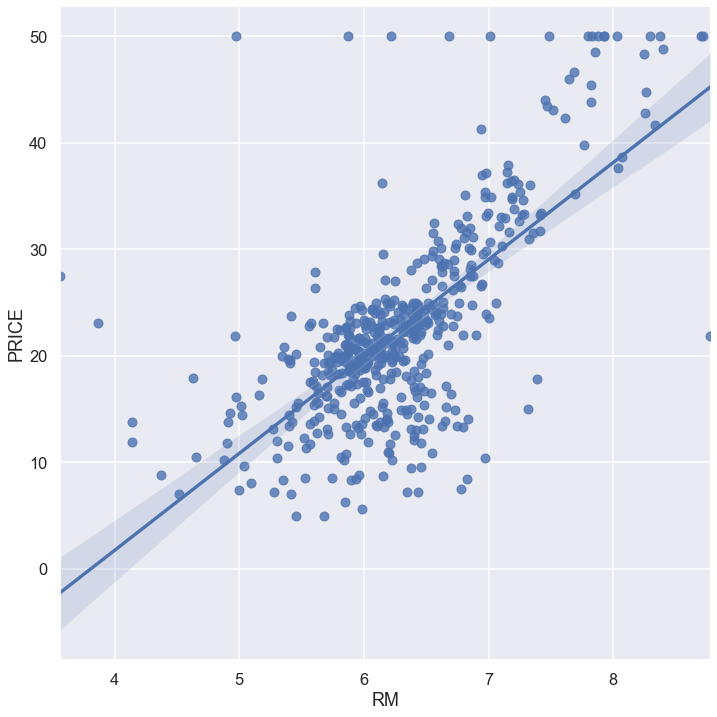

In [40]:
sns.lmplot(x='RM', y='PRICE', data=data, height=10)
plt.show()

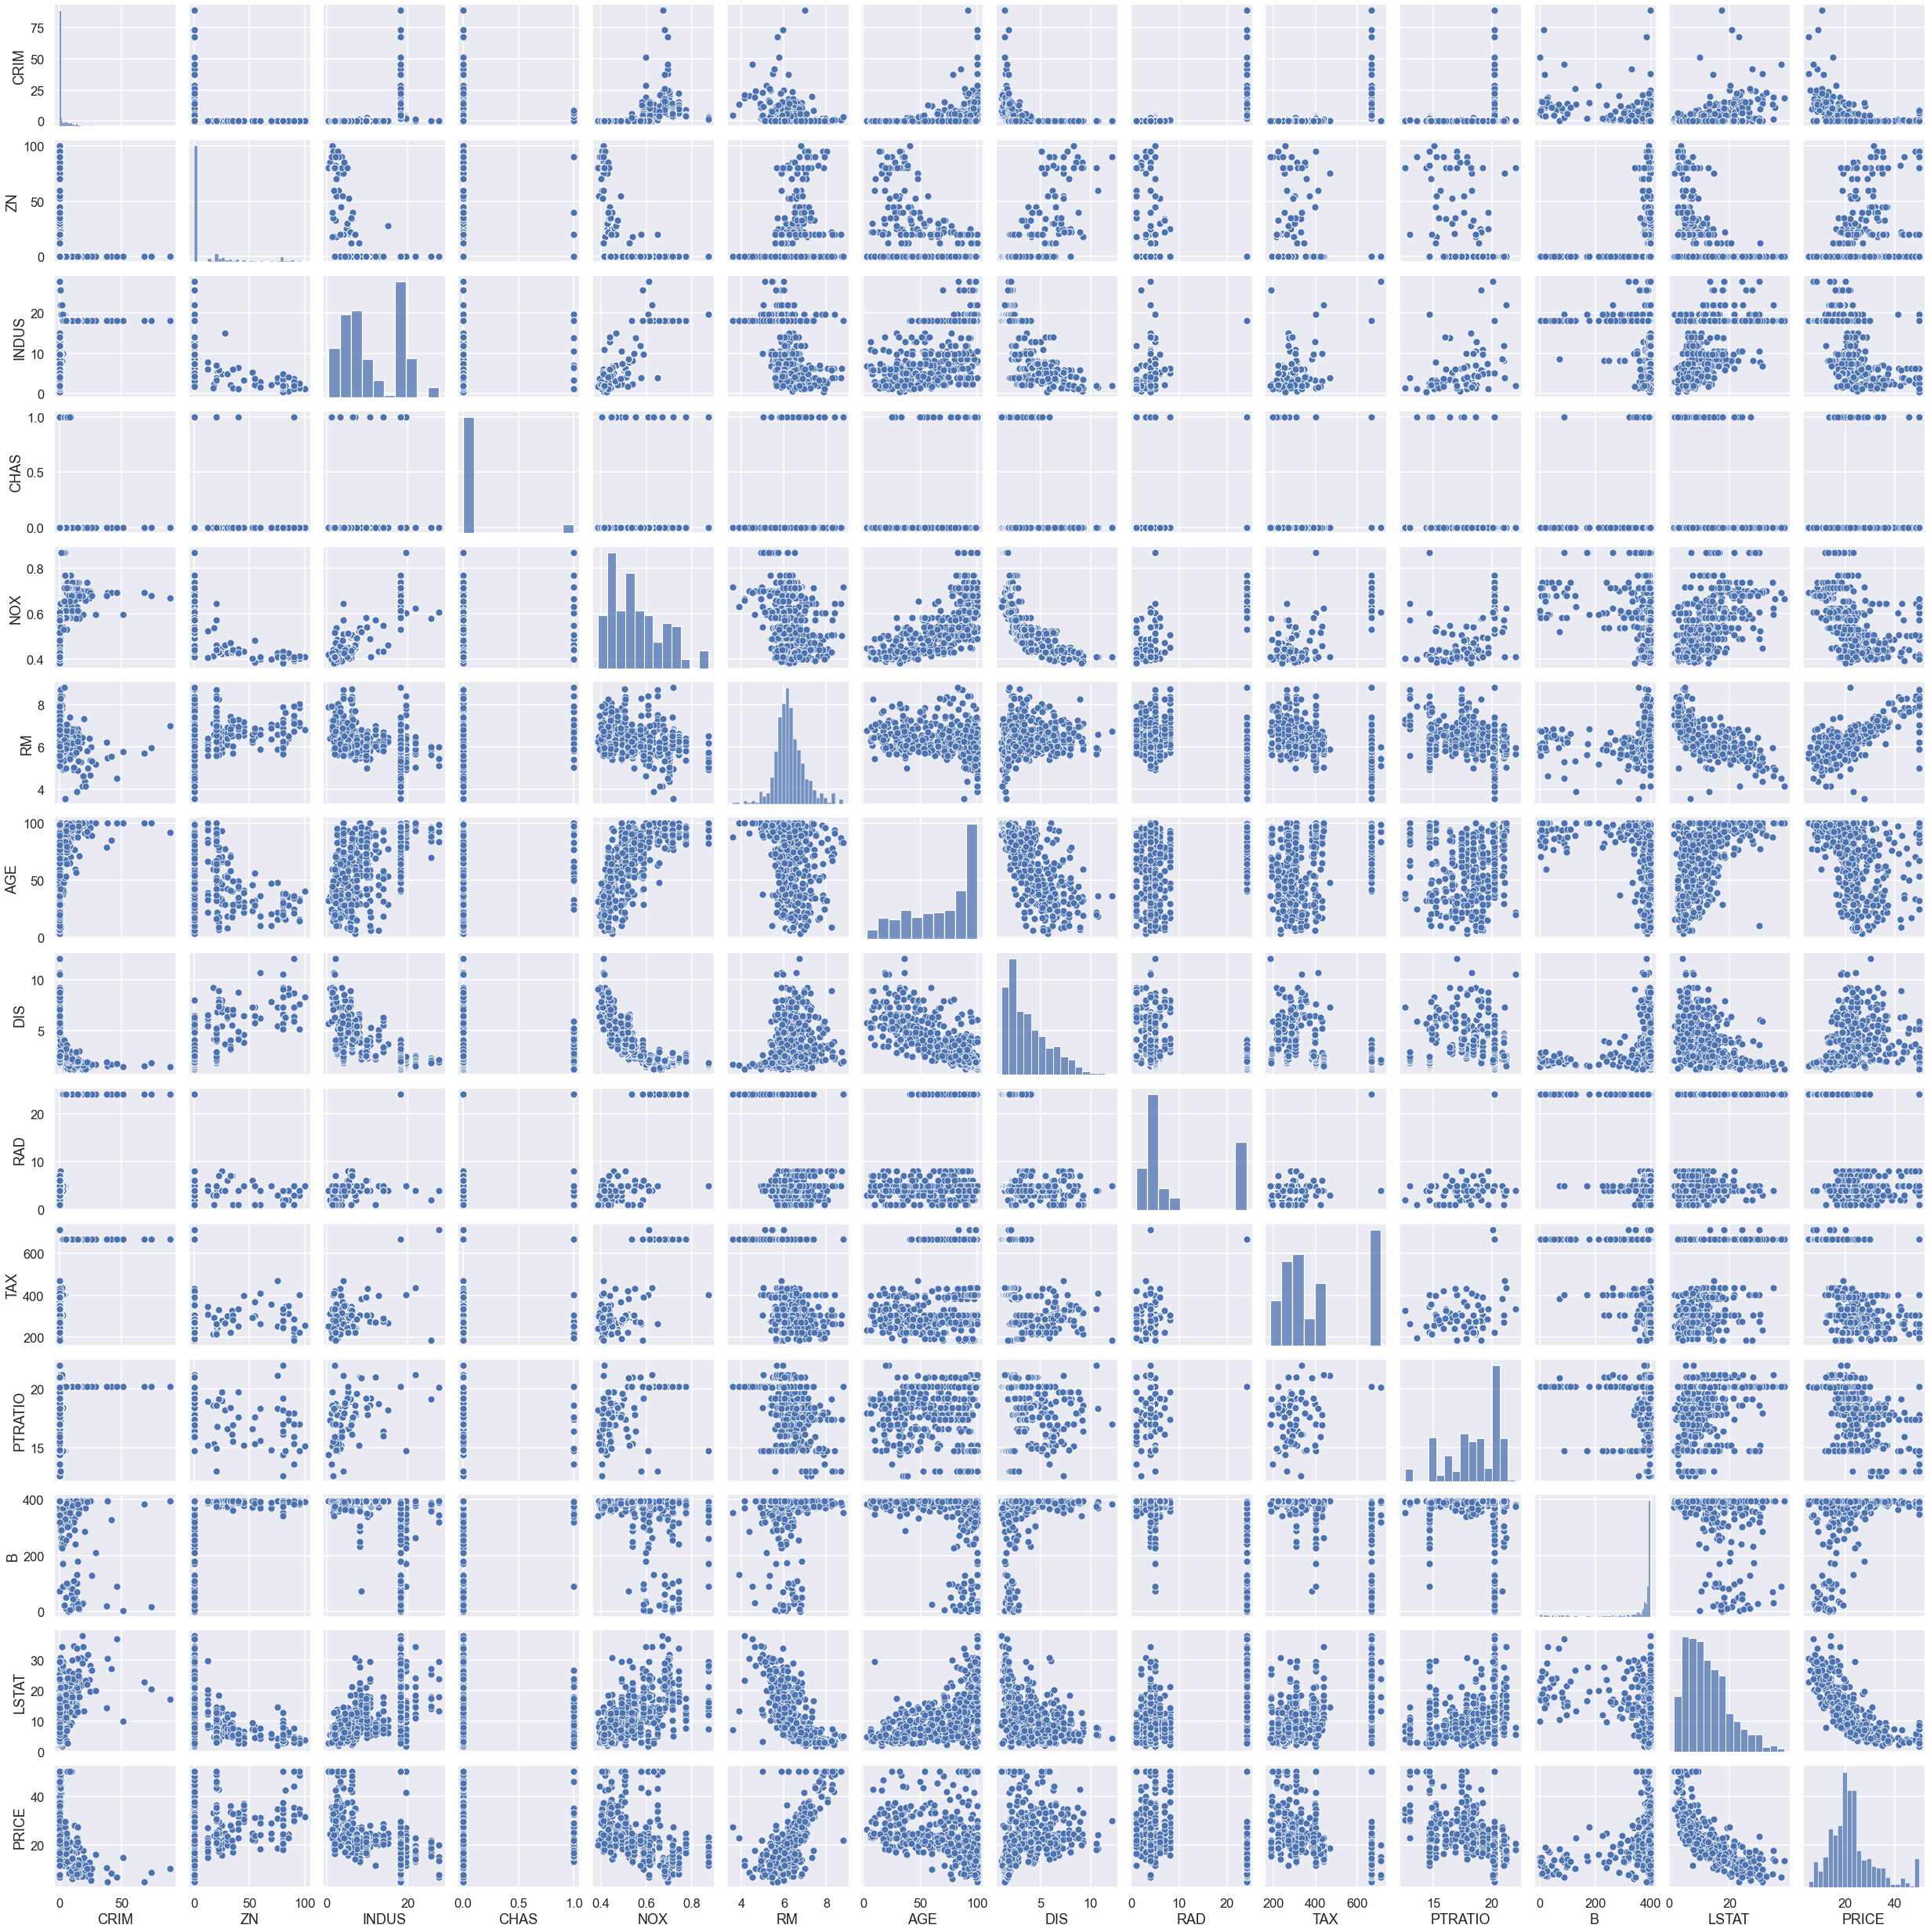

Wall time: 24.7 s


In [41]:
%%time

sns.pairplot(data)
plt.show()

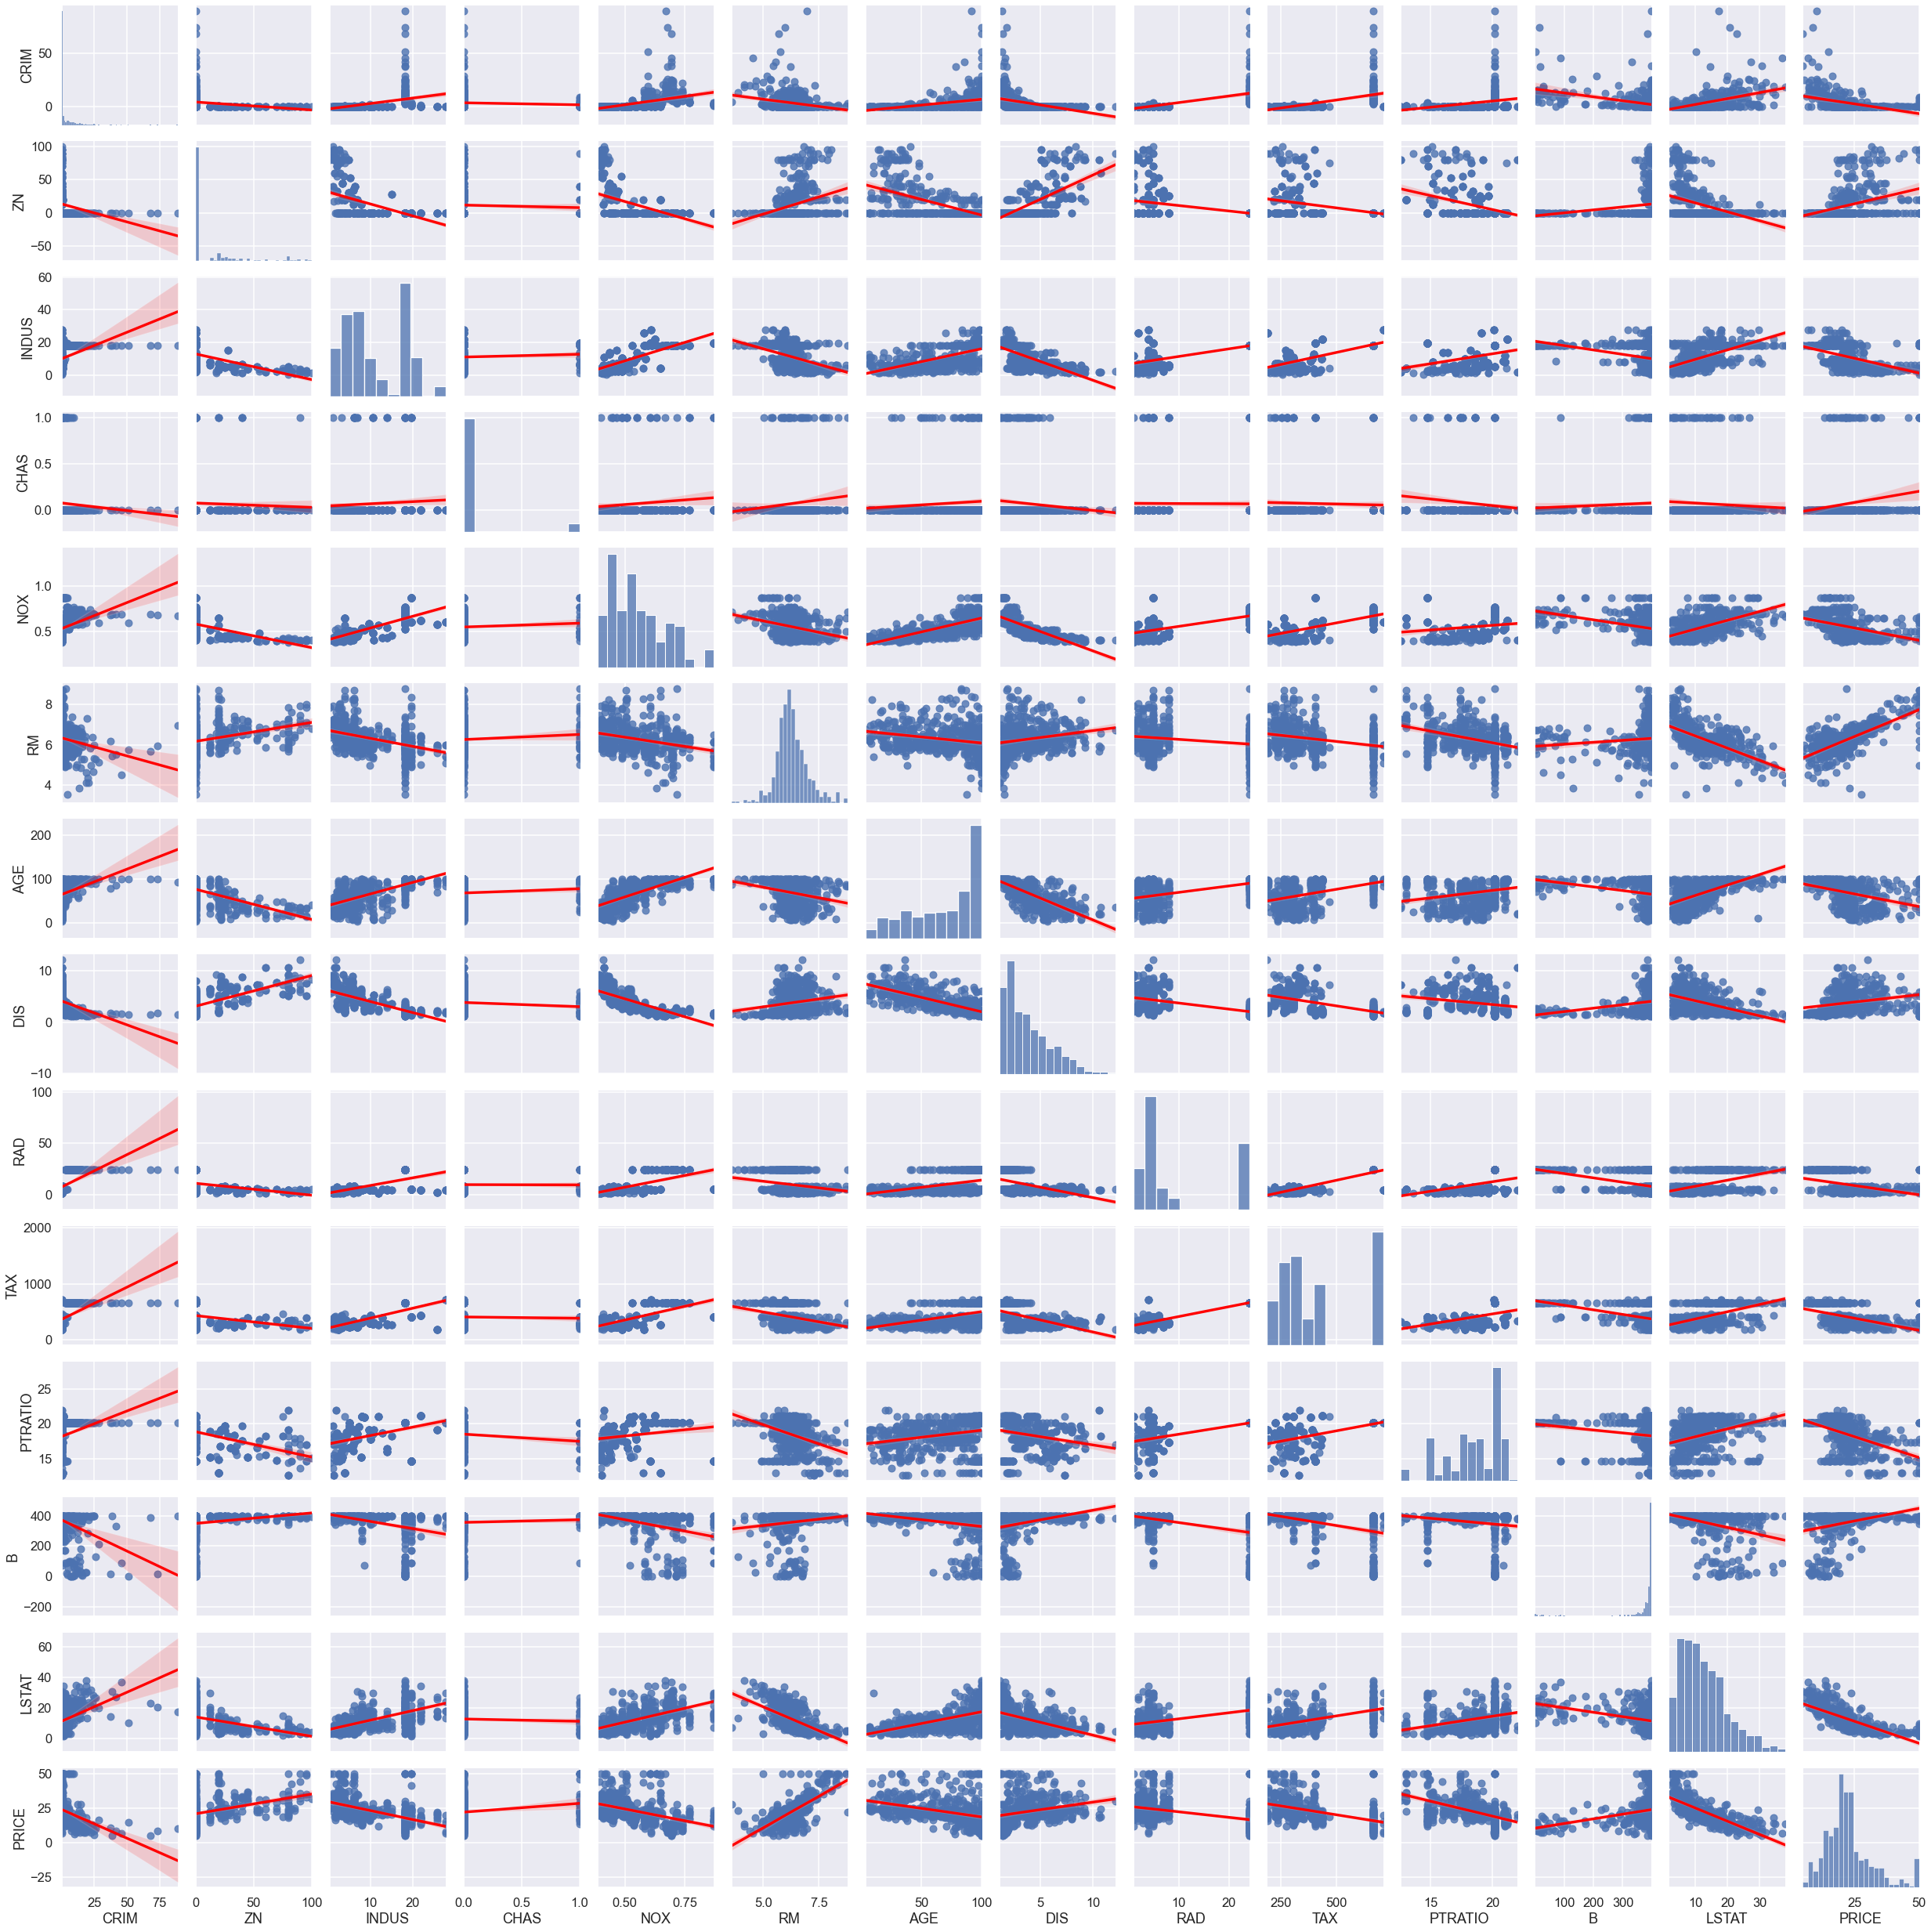

In [42]:
sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color': 'red'}})
plt.show()

## Training & Test dataset split

In [43]:
prices = data['PRICE']
features = data.drop('PRICE', axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(features, prices, test_size=0.2, random_state=10)
print(f'{X_train}\n')
print(f'{X_test}\n')
print(f'{Y_train}\n')
print(f'{Y_test}\n')

         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
50    0.08873  21.0   5.64   0.0  0.439  5.963   45.7  6.8147   4.0  243.0   
367  13.52220   0.0  18.10   0.0  0.631  3.863  100.0  1.5106  24.0  666.0   
34    1.61282   0.0   8.14   0.0  0.538  6.096   96.9  3.7598   4.0  307.0   
78    0.05646   0.0  12.83   0.0  0.437  6.232   53.7  5.0141   5.0  398.0   
172   0.13914   0.0   4.05   0.0  0.510  5.572   88.5  2.5961   5.0  296.0   
..        ...   ...    ...   ...    ...    ...    ...     ...   ...    ...   
320   0.16760   0.0   7.38   0.0  0.493  6.426   52.3  4.5404   5.0  287.0   
15    0.62739   0.0   8.14   0.0  0.538  5.834   56.5  4.4986   4.0  307.0   
484   2.37857   0.0  18.10   0.0  0.583  5.871   41.9  3.7240  24.0  666.0   
125   0.16902   0.0  25.65   0.0  0.581  5.986   88.4  1.9929   2.0  188.0   
265   0.76162  20.0   3.97   0.0  0.647  5.560   62.8  1.9865   5.0  264.0   

     PTRATIO       B  LSTAT  
50      16.8  395.56  13.45  
367

In [44]:
# % of training data set
len(X_train)/len(features)

0.7984189723320159

In [45]:
# % of test data set
X_test.shape[0]/features.shape[0]

0.2015810276679842

# Multivariable Regression

In [46]:
regr = LinearRegression()
regr.fit(X_train, Y_train)

print('Intercept: ',regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Intercept:  36.53305138282439


coef
CRIM     -0.128181
ZN        0.063198
INDUS    -0.007576
CHAS      1.974515
NOX     -16.271989
RM        3.108456
AGE       0.016292
DIS      -1.483014
RAD       0.303988
TAX      -0.012082
PTRATIO  -0.820306
B         0.011419
LSTAT    -0.581626

In [47]:
print('Intercept:', regr.intercept_)
print('training data r-squared:', regr.score(X_train, Y_train))
print('test data r-squared:', regr.score(X_test, Y_test))

Intercept: 36.53305138282439
training data r-squared: 0.750121534530608
test data r-squared: 0.6709339839115628


## Data Transformation

In [48]:
data['PRICE'].skew()

1.1080984082549072

In [49]:
y_log = np.log(data['PRICE'])
y_log.head()

0    3.178054
1    3.072693
2    3.546740
3    3.508556
4    3.589059
Name: PRICE, dtype: float64

In [50]:
y_log.skew()

-0.33032129530987864

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


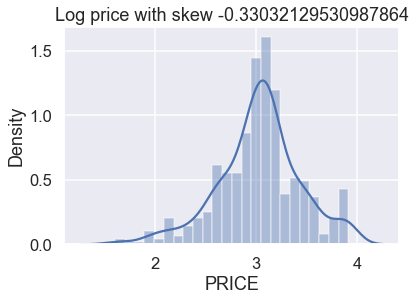

In [51]:
sns.distplot(y_log)
plt.title(f"Log price with skew {y_log.skew()}")
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


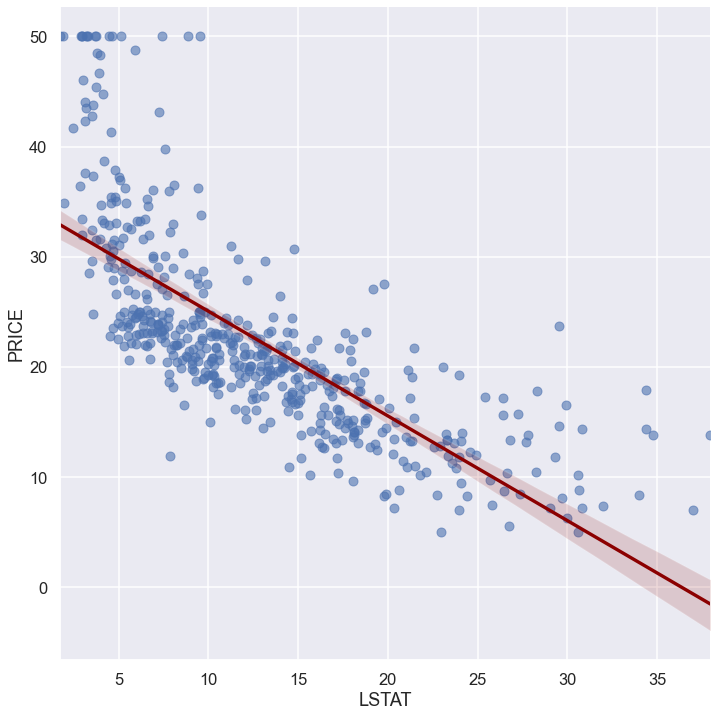

In [52]:
sns.lmplot(x='LSTAT', y='PRICE', data=data, size=10, scatter_kws={'alpha': 0.6}, line_kws={'color': 'darkred'})
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


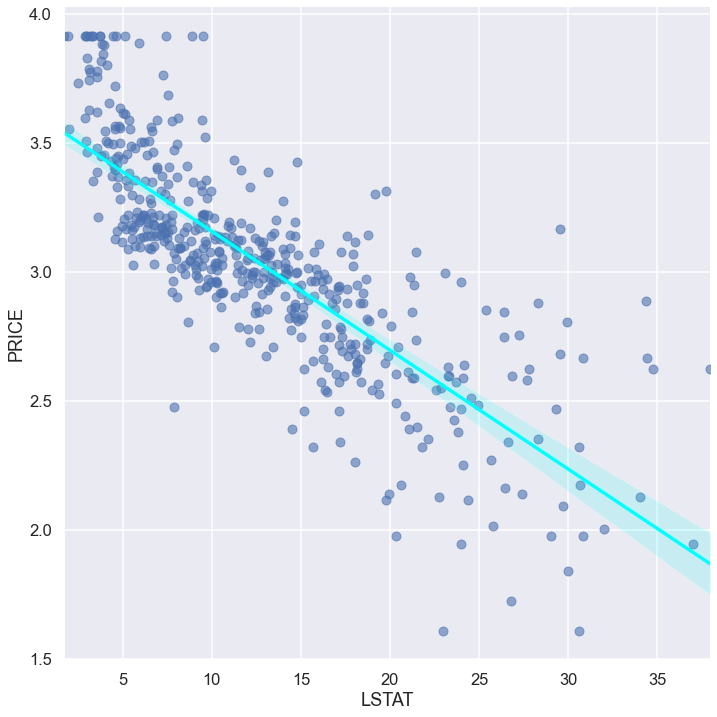

In [53]:
transformed_data = features
transformed_data['PRICE'] = y_log


sns.lmplot(x='LSTAT', y='PRICE', data=transformed_data, size=10, scatter_kws={'alpha': 0.6}, line_kws={'color': 'cyan'})
plt.show()

## Regression using log prices

In [54]:
prices = np.log(data['PRICE'])
features = data.drop('PRICE', axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(features, prices, test_size=0.2, random_state=10)
regr = LinearRegression()
regr.fit(X_train, Y_train)

print('Intercept: ',regr.intercept_)
print('training data r-squared:', regr.score(X_train, Y_train))
print('test data r-squared:', regr.score(X_test, Y_test))
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Intercept:  4.05994387177519
training data r-squared: 0.7930234826697583
test data r-squared: 0.7446922306260724


coef
CRIM    -0.010672
ZN       0.001579
INDUS    0.002030
CHAS     0.080331
NOX     -0.704068
RM       0.073404
AGE      0.000763
DIS     -0.047633
RAD      0.014565
TAX     -0.000645
PTRATIO -0.034795
B        0.000516
LSTAT   -0.031390

In [55]:
np.e**0.080331

1.0836456950439142

## P-values and evaluating coefficients

In [56]:
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_incl_const)
results = model.fit()
#results.params
#results.pvalues

pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})


coef  p-value
const    4.059944    0.000
CRIM    -0.010672    0.000
ZN       0.001579    0.009
INDUS    0.002030    0.445
CHAS     0.080331    0.038
NOX     -0.704068    0.000
RM       0.073404    0.000
AGE      0.000763    0.209
DIS     -0.047633    0.000
RAD      0.014565    0.000
TAX     -0.000645    0.000
PTRATIO -0.034795    0.000
B        0.000516    0.000
LSTAT   -0.031390    0.000

## Testing for Multicollinearity

### $$TAX = \alpha_0 + \alpha_1 RM + \alpha_2 NOX +...... + \alpha_{12} LSTAT$$
### $$VIF_{(TAX)} = \frac {1}{\big(1 - R^2_{TAX}\big)}$$

In [57]:
variance_inflation_factor(exog=X_incl_const.values, exog_idx=1)

1.7145250443932485

In [58]:
for count in range(len(X_incl_const.columns)):
    print(variance_inflation_factor(exog=X_incl_const.values, exog_idx=count))

597.5487126763895
1.7145250443932485
2.3328224265597584
3.943448822674636
1.0788133385000578
4.410320817897635
1.8404053075678568
3.3267660823099408
4.222923410477865
7.314299817005058
8.508856493040817
1.839911632651406
1.3386713255364715
2.812544292793034


In [59]:
vif = []

for count in range(len(X_incl_const.columns)):
    vif_values = variance_inflation_factor(exog=X_incl_const.values, exog_idx=count)
    vif.append(vif_values)
    
pd.DataFrame({'coef_name': X_incl_const.columns, 'VIF': vif})

coef_name         VIF
0      const  597.548713
1       CRIM    1.714525
2         ZN    2.332822
3      INDUS    3.943449
4       CHAS    1.078813
5        NOX    4.410321
6         RM    1.840405
7        AGE    3.326766
8        DIS    4.222923
9        RAD    7.314300
10       TAX    8.508856
11   PTRATIO    1.839912
12         B    1.338671
13     LSTAT    2.812544

## Model Simplification & the BIC

In [60]:
# Original model with the log prices and all features 

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_incl_const)
results = model.fit()
#results.params
#results.pvalues

org_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('r-squared is:',results.rsquared)
print('BIC is:',results.bic)


r-squared is: 0.7930234826697582
BIC is: -139.74997769478875


In [61]:
# Reduced model #1 Excluding INDUS 

X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS'], axis=1)


model = sm.OLS(Y_train, X_incl_const)
results = model.fit()
#results.params
#results.pvalues

coef_minus_indus = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('r-squared is:',results.rsquared)
print('BIC is:',results.bic)

r-squared is: 0.7927126289415163
BIC is: -145.14508855591163


In [62]:
# Reduced model #1 Excluding INDUS and AGE

X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS','AGE'], axis=1)


model = sm.OLS(Y_train, X_incl_const)
results = model.fit()
#results.params
#results.pvalues

reduced_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('r-squared is:',results.rsquared)
print('BIC is:',results.bic)

r-squared is: 0.7918657661852815
BIC is: -149.49934294224656


In [63]:
frames = [org_coef, coef_minus_indus, reduced_coef]
pd.concat(frames, axis=1)

coef  p-value      coef  p-value      coef  p-value
const    4.059944    0.000  4.056231    0.000  4.035922    0.000
CRIM    -0.010672    0.000 -0.010721    0.000 -0.010702    0.000
ZN       0.001579    0.009  0.001551    0.010  0.001461    0.014
INDUS    0.002030    0.445       NaN      NaN       NaN      NaN
CHAS     0.080331    0.038  0.082795    0.032  0.086449    0.025
NOX     -0.704068    0.000 -0.673365    0.000 -0.616448    0.000
RM       0.073404    0.000  0.071739    0.000  0.076133    0.000
AGE      0.000763    0.209  0.000766    0.207       NaN      NaN
DIS     -0.047633    0.000 -0.049394    0.000 -0.052692    0.000
RAD      0.014565    0.000  0.014014    0.000  0.013743    0.000
TAX     -0.000645    0.000 -0.000596    0.000 -0.000590    0.000
PTRATIO -0.034795    0.000 -0.034126    0.000 -0.033481    0.000
B        0.000516    0.000  0.000511    0.000  0.000518    0.000
LSTAT   -0.031390    0.000 -0.031262    0.000 -0.030271    0.000

## Residuals and Residual Plots

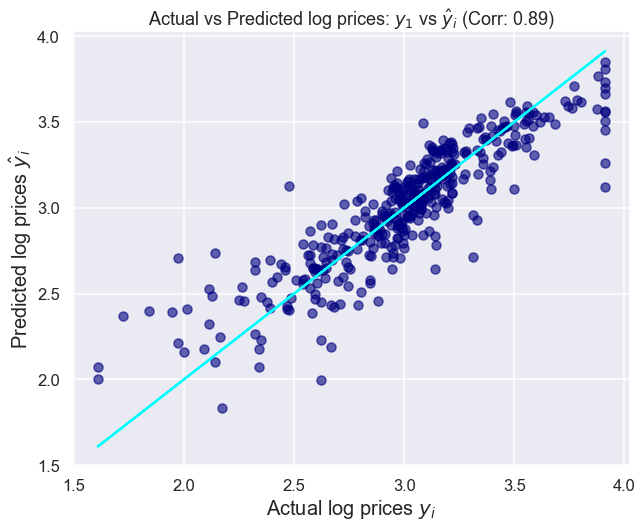

In [64]:
# Modified model: transformed (using log prices) & simplified (dropping two features)

prices = np.log(data['PRICE'])
features = data.drop(['PRICE', 'INDUS', 'AGE'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

# Using statsmodel
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_incl_const)
results = model.fit()

# Residuals
#residuals = Y_train - results.fittedvalues
results.resid

# Graph of actual prices vs predicted prices
corr = round(Y_train.corr(results.fittedvalues), 2)

plt.figure(figsize=(10, 8))
plt.scatter(x=Y_train, y=results.fittedvalues, c='navy', alpha=0.6)
plt.title(f"Actual vs Predicted log prices: $y_1$ vs $\hat y_i$ (Corr: {corr})")
plt.xlabel('Actual log prices $y_i$', fontsize=20)
plt.ylabel('Predicted log prices $\hat y_i$', fontsize=20)
plt.plot(Y_train, Y_train, c='cyan')
plt.show()

# MSE(Mean Squared Error) and R-squared
reduced_log_mse = round(results.mse_resid, 3)
reduced_log_rsquared = round(results.rsquared, 3)

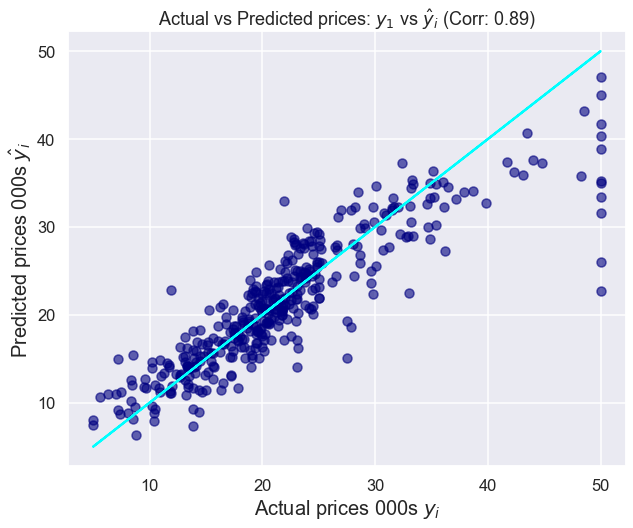

In [65]:
# Modified model: transformed (using log prices) & simplified (dropping two features)

prices = np.log(data['PRICE'])
features = data.drop(['PRICE', 'INDUS', 'AGE'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

# Using statsmodel
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_incl_const)
results = model.fit()

# Residuals
#residuals = Y_train - results.fittedvalues
results.resid

# Graph of actual prices vs predicted prices
corr = round(Y_train.corr(results.fittedvalues), 2)

plt.figure(figsize=(10, 8))
plt.scatter(x=np.e**Y_train, y=np.e**results.fittedvalues, c='navy', alpha=0.6)
plt.title(f"Actual vs Predicted prices: $y_1$ vs $\hat y_i$ (Corr: {corr})")
plt.xlabel('Actual prices 000s $y_i$', fontsize=20)
plt.ylabel('Predicted prices 000s $\hat y_i$', fontsize=20)
plt.plot(np.e**Y_train, np.e**Y_train, c='cyan')
plt.show()


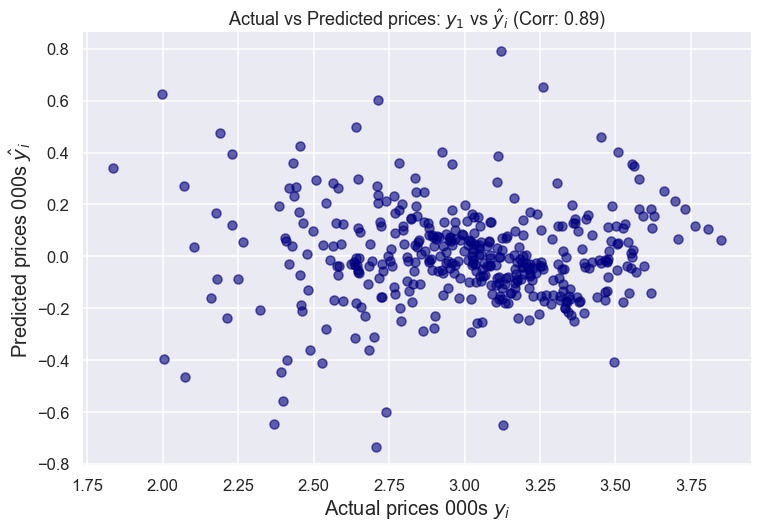

In [66]:
plt.figure(figsize=(12, 8))
plt.scatter(x=results.fittedvalues, y=results.resid, c='navy', alpha=0.6)
plt.title(f"Actual vs Predicted prices: $y_1$ vs $\hat y_i$ (Corr: {corr})")
plt.xlabel('Actual prices 000s $y_i$', fontsize=20)
plt.ylabel('Predicted prices 000s $\hat y_i$', fontsize=20)
#plt.plot(np.e**Y_train, np.e**Y_train, c='cyan')
plt.show()

In [67]:
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


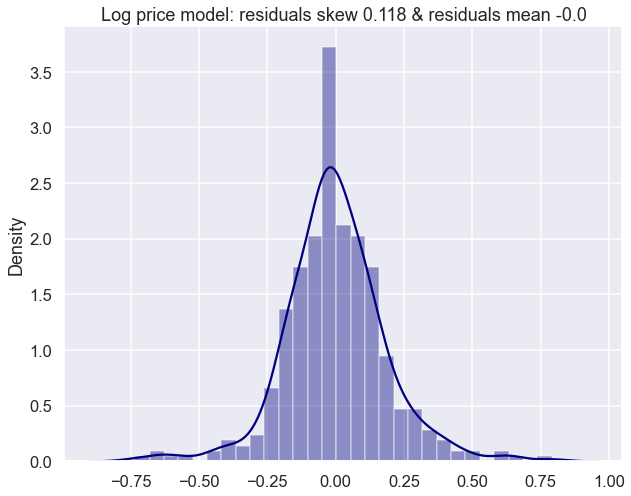

In [68]:
plt.figure(figsize=(10, 8))
sns.distplot(results.resid, color='navy')
plt.title(f'Log price model: residuals skew {resid_skew} & residuals mean {resid_mean}')
plt.show()

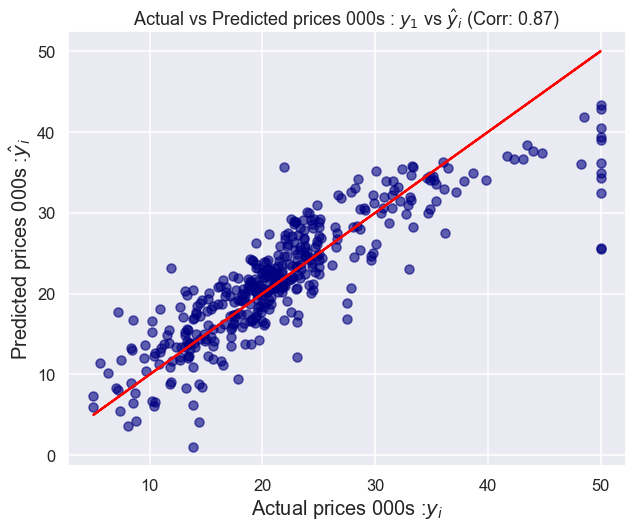

In [69]:
# Original model: normal prices & all features 

prices = data['PRICE']
features = data.drop(['PRICE'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

# Using statsmodel
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_incl_const)
results = model.fit()

# Residuals
#residuals = Y_train - results.fittedvalues
results.resid

# Graph of actual prices vs predicted prices
corr = round(Y_train.corr(results.fittedvalues), 2)

plt.figure(figsize=(10, 8))
plt.scatter(x=Y_train, y=results.fittedvalues, c='navy', alpha=0.6)
plt.title(f"Actual vs Predicted prices 000s : $y_1$ vs $\hat y_i$ (Corr: {corr})")
plt.xlabel('Actual prices 000s :$y_i$', fontsize=20)
plt.ylabel('Predicted prices 000s :$\hat y_i$', fontsize=20)
plt.plot(Y_train, Y_train, c='red')
plt.show()

# MSE(Mean Squared Error) and R-squared
full_normal_mse = round(results.mse_resid, 3)
full_normal_rsquared = round(results.rsquared, 3)

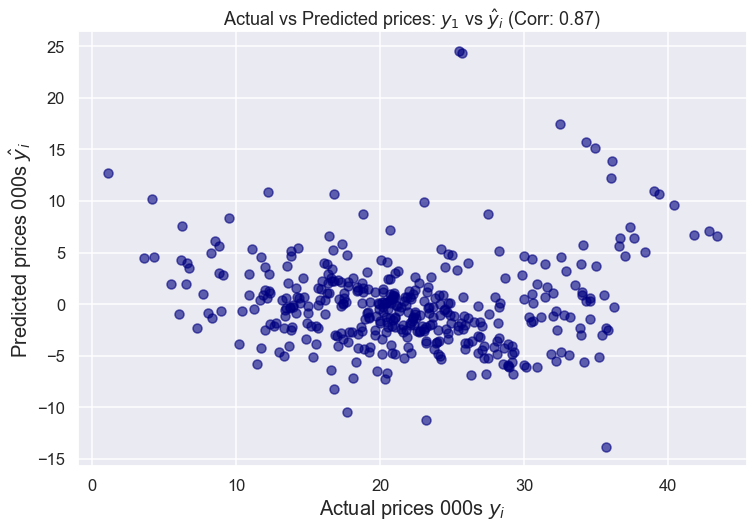

In [70]:
plt.figure(figsize=(12, 8))
plt.scatter(x=results.fittedvalues, y=results.resid, c='navy', alpha=0.6)
plt.title(f"Actual vs Predicted prices: $y_1$ vs $\hat y_i$ (Corr: {corr})")
plt.xlabel('Actual prices 000s $y_i$', fontsize=20)
plt.ylabel('Predicted prices 000s $\hat y_i$', fontsize=20)
#plt.plot(np.e**Y_train, np.e**Y_train, c='cyan')
plt.show()

In [71]:
# Residual distribution chart

resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


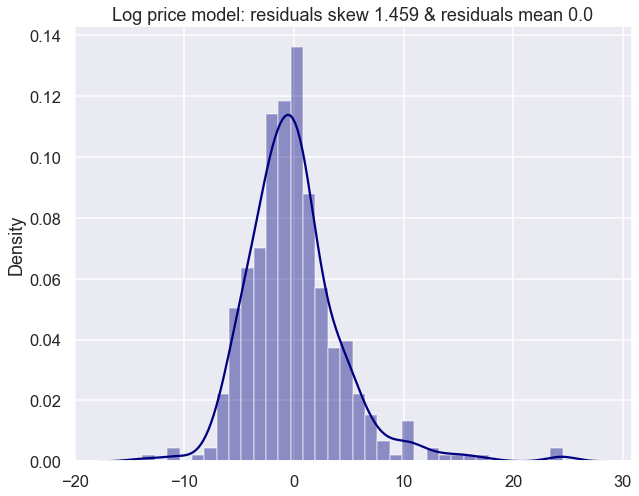

In [72]:
plt.figure(figsize=(10, 8))
sns.distplot(results.resid, color='navy')
plt.title(f'Log price model: residuals skew {resid_skew} & residuals mean {resid_mean}')
plt.show()

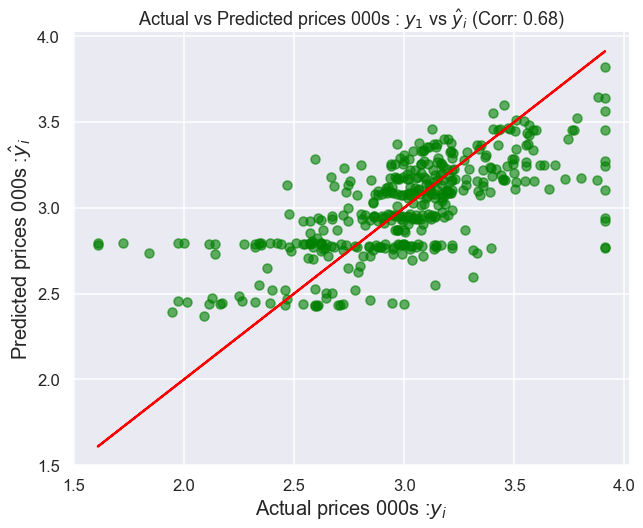

In [73]:
# Model ommiting key features using log prices 

prices = np.log(data['PRICE'])
features = data.drop(['PRICE', 'AGE', 'LSTAT', 'CRIM', 'RM', 'INDUS', 'NOX'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

# Using statsmodel
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_incl_const)
results = model.fit()

# Residuals
#residuals = Y_train - results.fittedvalues
results.resid

# Graph of actual prices vs predicted prices
corr = round(Y_train.corr(results.fittedvalues), 2)

plt.figure(figsize=(10, 8))
plt.scatter(x=Y_train, y=results.fittedvalues, c='green', alpha=0.6)
plt.title(f"Actual vs Predicted prices 000s : $y_1$ vs $\hat y_i$ (Corr: {corr})")
plt.xlabel('Actual prices 000s :$y_i$', fontsize=20)
plt.ylabel('Predicted prices 000s :$\hat y_i$', fontsize=20)
plt.plot(Y_train, Y_train, c='red')
plt.show()

# MSE(Mean Squared Error) and R-squared
omitted_var_mse = round(results.mse_resid, 3)
omitted_var_rsquared = round(results.rsquared, 3)

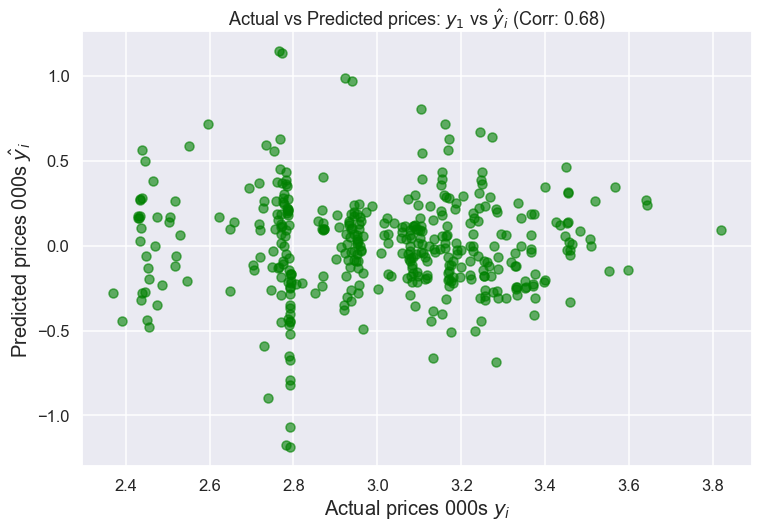

In [74]:
plt.figure(figsize=(12, 8))
plt.scatter(x=results.fittedvalues, y=results.resid, c='green', alpha=0.6)
plt.title(f"Actual vs Predicted prices: $y_1$ vs $\hat y_i$ (Corr: {corr})")
plt.xlabel('Actual prices 000s $y_i$', fontsize=20)
plt.ylabel('Predicted prices 000s $\hat y_i$', fontsize=20)
#plt.plot(np.e**Y_train, np.e**Y_train, c='cyan')
plt.show()

In [75]:
pd.DataFrame({'R-squared': [reduced_log_rsquared,full_normal_rsquared, omitted_var_rsquared],
             'MSE': [reduced_log_mse,full_normal_mse, omitted_var_mse],
             'RMSE': np.sqrt([reduced_log_mse,full_normal_mse, omitted_var_mse])},
            index=['Reduced log Model', 'Full normal price Model', 'Omitted var Model'])

R-squared     MSE      RMSE
Reduced log Model            0.792   0.035  0.187083
Full normal price Model      0.750  19.921  4.463295
Omitted var Model            0.460   0.090  0.300000

In [76]:
# To find range for the house having estimated price of $30,000 uptil 95% prediction interval 

print('Standard Deviation:', np.sqrt(reduced_log_mse))
print('double Standard Deviation:', 2*np.sqrt(reduced_log_mse))
estimate = np.log(30) # log price for actual price in 000s
upper_bound = estimate + 2*np.sqrt(reduced_log_mse)
lower_bound = estimate - 2*np.sqrt(reduced_log_mse)

print('Upper limit for the house estimate',(np.e**upper_bound)*1000)
print('Lower limit for the house estimate',(np.e**lower_bound)*1000)

Standard Deviation: 0.18708286933869708
double Standard Deviation: 0.37416573867739417
Upper limit for the house estimate 43613.34233239937
Lower limit for the house estimate 20635.886906824155
